In [1]:
import tensorflow as tf
from PIL import Image
import glob
import numpy as np
import scipy.ndimage.filters
import matplotlib.pyplot as plt


C:\Users\anik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


13779


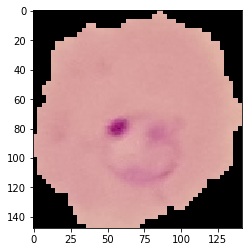

13779


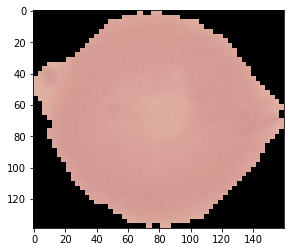

In [5]:

image_list_infect = []
for filename in glob.glob('./cell_images/Parasitized/*.png'):
    im=Image.open(filename)
    image_list_infect.append(im.copy())
    im.close()


print(len(image_list_infect))
plt.imshow(image_list_infect[0]) 
plt.show()  

image_list_uninfect = []
for filename in glob.glob('./cell_images/Uninfected/*.png'):
    im=Image.open(filename)
    image_list_uninfect.append(im.copy())
    im.close()

print(len(image_list_uninfect))
plt.imshow(image_list_uninfect[0]) 
plt.show()


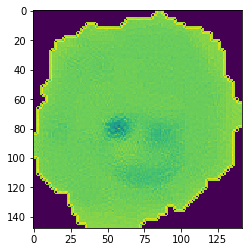

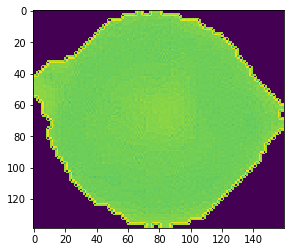

1058708
3112998


In [6]:
lap_infect = scipy.ndimage.filters.laplace(image_list_infect[0])
lap_uninfect = scipy.ndimage.filters.laplace(image_list_uninfect[0])
plt.imshow(lap_infect[:,:,0]) 
plt.show()
plt.imshow(lap_uninfect[:,:,0]) 
plt.show()

lap_infect.shape


lap_infect_mat = np.matrix(lap_infect[:,:,1])
lap_uninfect_mat = np.matrix(lap_uninfect[:,:,0])

print(lap_infect_mat.sum())
print(lap_uninfect_mat.sum())

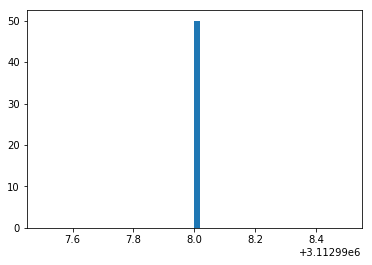

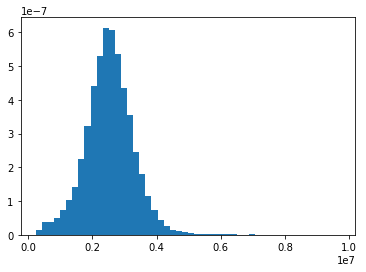

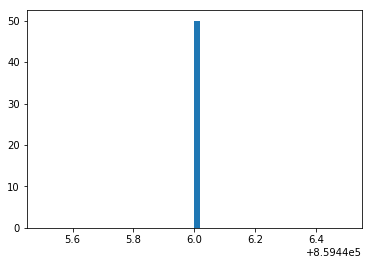

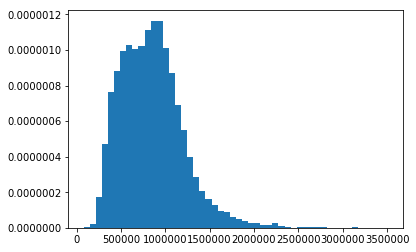

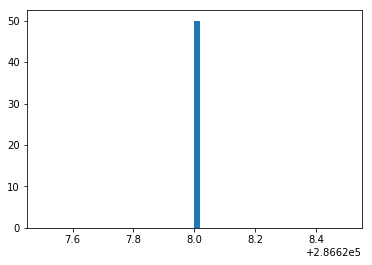

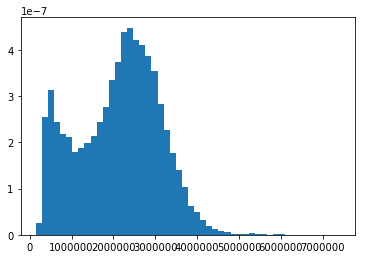

In [7]:
hist_lap_infect0 = []
hist_lap_infect1 = []
hist_lap_infect2 = []


hist_lap_uninfect0 = []
hist_lap_uninfect1 = []
hist_lap_uninfect2 = []


for infect in image_list_infect:
    lap_infect = scipy.ndimage.filters.laplace(infect)
    
    lap_infect_mat0 = np.matrix(lap_infect[:,:,0])
    lap_infect_mat1 = np.matrix(lap_infect[:,:,1])
    lap_infect_mat2 = np.matrix(lap_infect[:,:,2])

    hist_lap_infect0.append(lap_infect_mat0.sum())
    hist_lap_infect1.append(lap_infect_mat1.sum())
    hist_lap_infect2.append(lap_infect_mat2.sum())

    
for uninfect in image_list_uninfect:
    lap_infect = scipy.ndimage.filters.laplace(infect)
    
    lap_uninfect_mat0 = np.matrix(lap_uninfect[:,:,0])
    lap_uninfect_mat1 = np.matrix(lap_uninfect[:,:,1])
    lap_uninfect_mat2 = np.matrix(lap_uninfect[:,:,2])

    hist_lap_uninfect0.append(lap_uninfect_mat0.sum())
    hist_lap_uninfect1.append(lap_uninfect_mat1.sum())
    hist_lap_uninfect2.append(lap_uninfect_mat2.sum())
    
plt.hist(hist_lap_uninfect0, bins=50,normed=True)
plt.show()
plt.hist(hist_lap_infect0, bins=50,normed=True)  
plt.show()

plt.hist(hist_lap_uninfect1, bins=50,normed=True)
plt.show()
plt.hist(hist_lap_infect1, bins=50,normed=True)  
plt.show()


plt.hist(hist_lap_uninfect2, bins=50,normed=True)
plt.show()
plt.hist(hist_lap_infect2, bins=50,normed=True)  
plt.show()




In [8]:
import pickle


with open('./pickle/hist_lap_infect0.pickle', 'wb') as handle:
    pickle.dump(hist_lap_infect0, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('./pickle/hist_lap_infect1.pickle', 'wb') as handle:
    pickle.dump(hist_lap_infect1, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('./pickle/hist_lap_infect2.pickle', 'wb') as handle:
    pickle.dump(hist_lap_infect2, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('./pickle/hist_lap_uninfect0.pickle', 'wb') as handle:
    pickle.dump(hist_lap_uninfect0, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('./pickle/hist_lap_uninfect1.pickle', 'wb') as handle:
    pickle.dump(hist_lap_uninfect1, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('./pickle/hist_lap_uninfect2.pickle', 'wb') as handle:
    pickle.dump(hist_lap_uninfect2, handle, protocol=pickle.HIGHEST_PROTOCOL)